In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data.csv')
df['new_target'] = df['Cholesterol Total (mg/dL)'].apply(
    lambda x: 1 if x == 187 else 0)
df.set_index('Responden', inplace=True)
df.drop('Cholesterol Total (mg/dL)', axis=1, inplace=True)
df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,Tempat lahir,new_target
Responden,,,,,,,,,,,,,,,
1,M,19.0,126.0,88.0,172.5,49.5,16.53,66.0,84.0,99.0,26.4,6.0,0.97,Purworejo,1
2,M,19.0,120.0,80.0,158.0,53.6,21.50,71.0,84.0,99.0,26.4,6.0,0.60,Bogor,1
3,M,19.0,120.0,80.0,170.0,59.5,20.59,80.0,80.0,99.0,26.4,6.0,1.37,bandung,1
4,F,19.0,100.0,70.0,149.0,45.1,20.31,62.0,81.0,99.0,30.5,3.5,1.00,Jakarta,1
5,M,19.0,110.0,70.0,171.6,62.4,21.19,78.0,84.0,99.0,26.4,6.0,4.00,Teluk Betung,1


In [ ]:
# encoding Jenis Kelamin if M = 1 and F = 0

df["Jenis Kelamin"] = df["Jenis Kelamin"].apply(lambda x: 1 if x == 'M' else 0)

# drop Tempat lahir
df.drop('Tempat lahir', axis=1, inplace=True)
df.head()

,Jenis Kelamin,Usia,Tekanan darah (S),Tekanan darah (D),Tinggi badan (cm),Berat badan (kg),IMT (kg/m2),Lingkar perut (cm),Glukosa Puasa (mg/dL),Trigliserida (mg/dL),Fat,Visceral Fat,Masa Kerja,new_target
Responden,,,,,,,,,,,,,,
1,1,19.0,126.0,88.0,172.5,49.5,16.53,66.0,84.0,99.0,26.4,6.0,0.97,1
2,1,19.0,120.0,80.0,158.0,53.6,21.50,71.0,84.0,99.0,26.4,6.0,0.60,1
3,1,19.0,120.0,80.0,170.0,59.5,20.59,80.0,80.0,99.0,26.4,6.0,1.37,1
4,0,19.0,100.0,70.0,149.0,45.1,20.31,62.0,81.0,99.0,30.5,3.5,1.00,1
5,1,19.0,110.0,70.0,171.6,62.4,21.19,78.0,84.0,99.0,26.4,6.0,4.00,1


In [ ]:
y = df['new_target']
X = df.drop('new_target', axis=1)

# Splitting the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

# Creating XGBoost model
model = XGBClassifier()

# Fitting the model
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Performing stratified k-fold cross-validation
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True)
cv_scores = cross_val_score(
    model, X, y, cv=stratified_kfold, scoring='accuracy')

# Printing cross-validation scores
print("Cross-validation scores:", cv_scores)
print("Mean CV accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.99626866 0.98880597 0.98880597 0.98134328 0.98501873]
Mean CV accuracy: 0.988048521437755


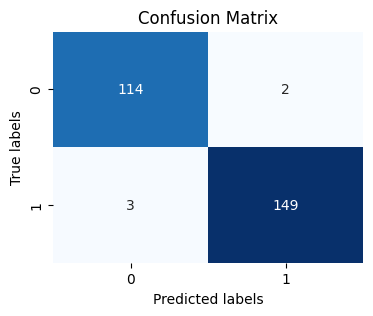

Probability of False Positive: 0.017241379310344827
Probability of False Negative: 0.019736842105263157
Probability of True Positive: 0.5559701492537313
Probability of True Negative: 0.4253731343283582
Accuracy: 0.9813432835820896


In [ ]:
# Creating confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix")
plt.show()


# Extracting TP, TN, FP, FN from confusion matrix
TN, FP, FN, TP = conf_matrix.ravel()

# Total number of samples
total_samples = len(y_test)

# Calculating probability of false positives and false negatives
false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

print("Probability of False Positive:", false_positive_rate)
print("Probability of False Negative:", false_negative_rate)

# Calculating probability of true positive and true negative
true_positive_probability = TP / total_samples
true_negative_probability = TN / total_samples

print("Probability of True Positive:", true_positive_probability)
print("Probability of True Negative:", true_negative_probability)

accuracy = (TP + TN) / total_samples

print("Accuracy:", accuracy)